<a href="https://colab.research.google.com/github/Blockchain-Framework/bitcoin-anomaly-analysis/blob/develop/Notebooks/cnn/2d_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import models, datasets, layers, Sequential
from tensorflow.keras.layers import Conv2D, Input, Dropout, Activation, Dense, MaxPooling2D, Flatten, AveragePooling2D, LayerNormalization

### Splitting Data


In [3]:

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [4]:
# X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

In [5]:
# y_train.head()

In [130]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FYP/Anomaly/bitcoin_imbalance_train_set.csv')
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/FYP/Anomaly/bitcoin_imbalance_test.csv")

In [131]:
# Split train dataset
X_train = train.drop(columns=['label'])  # Drop the 'label' column for features
y_train = train['label']  # Select the 'label' column for the target variable

# Split test dataset
X_test = test.drop(columns=['label'])  # Drop the 'label' column for features
y_test = test['label']  # Select the 'label' column for the target variable

In [132]:
# Convert multi-class to binary classification for the target variable
y_train = y_train.apply(lambda x: 1 if x > 0 else 0)
y_test = y_test.apply(lambda x: 1 if x > 0 else 0)

In [133]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)

### Features Extraction

In [40]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold

# forest = RandomForestClassifier()
# _ = forest.fit(X_train, y_train)
# print(forest.score(X_test, y_test))

In [41]:
# rfe = RFE(forest, n_features_to_select=20)

# # Define 5-fold cross-validation object
# cv = KFold(n_splits=5, shuffle=True, random_state=1)

# # Perform RFE with 5-fold cross-validation
# scores = cross_val_score(rfe, X_train, y_train, cv=cv)

# # Print mean score and standard deviation
# print('Accuracy: {:.3f} (+/- {:.3f})'.format(scores.mean(), scores.std()))

In [42]:
# pd.DataFrame(
#     zip(X_train.columns, abs(forest.feature_importances_)),
#     columns=["feature", "weight"],
# ).sort_values("weight").reset_index(drop=True)

In [43]:
# from sklearn.feature_selection import RFECV
# from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
# from sklearn.model_selection import cross_validate
# # Init, fit
# # scoring = ['accuracy', 'precision', 'recall', 'f1']
# rfecv = RFECV(
#     estimator=RandomForestClassifier(),
#     min_features_to_select=20,
#     n_jobs=-1,
#     step=10,
#     scoring='f1_macro',
#     cv=5
# )

In [44]:
# _ = rfecv.fit(X_train, y_train)

In [45]:
# print(X_train.columns[rfecv.get_support()])

In [46]:
# selected_features = X_train.columns[rfecv.get_support()]
# # selected_features=selected_features.tolist()

In [47]:
# selected_features

In [48]:
# n=20
# feature_importance = _.estimator_.feature_importances_  # or coef_
# feature_importance_sorted = sorted(enumerate(feature_importance), key=lambda x: x[1])
# top_n_idx = [idx for idx, _ in feature_importance_sorted[:n]]

# top_64_features = X_train.columns[top_n_idx]
# top_64_features = top_64_features.tolist()
# top_64_features

In [49]:
# features_removed=(set(X_train.columns)-set(top_64_features))
# features_removed

In [134]:
features_to_be_dropped=['input_output_max_ratio',
 'input_output_maximum_transaction_value_diff',
 'input_output_mean_ratio',
 'input_output_min_ratio',
 'input_output_minimum_transaction_value_diff',
 'input_output_percentile_25_diff',
 'input_output_percentile_75_diff',
 'input_output_time_diff_max_min_diff',
 'input_output_transaction_count_ratio',
 'input_output_usd_max_ratio',
 'input_output_usd_min_ratio',
 'input_output_usd_percentile_25_diff',
 'input_output_usd_percentile_75_diff',
 'input_range_mean_ratio',
 'input_spending_value_usd_25th_percentile',
 'input_spending_value_usd_75th_percentile',
 'input_spending_value_usd_maximum',
 'input_spending_value_usd_mean',
 'input_spending_value_usd_median',
 'input_spending_value_usd_minimum',
 'input_time_diff_25th_percentile',
 'input_time_diff_median',
 'input_time_diff_minimum',
 'input_time_diff_range',
 'input_value_25th_percentile',
 'input_value_75th_percentile',
 'input_value_maximum',
 'input_value_mean',
 'input_value_median',
 'input_value_minimum',
 'output_range_mean_ratio',
 'output_time_diff_75th_percentile',
 'output_time_diff_range',
 'output_value_maximum',
 'output_value_mean',
 'output_value_median',
 'output_value_minimum',
 'output_value_usd_25th_percentile',
 'output_value_usd_maximum',
 'output_value_usd_mean',
 'output_value_usd_median',
 'output_value_usd_minimum']

In [135]:
X_train=X_train.drop(features_to_be_dropped, axis=1)
X_test=X_test.drop(features_to_be_dropped, axis=1)
X_val=X_val.drop(features_to_be_dropped, axis=1)

## Model Training

### Multiclass Classification

In [136]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(54606, 20)
(17800, 20)
(18203, 20)


In [137]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LayerNormalization
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy

# cnn2d = Sequential()
# cnn2d.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', padding='same', input_shape=(5, 4, 1)))
# cnn2d.add(LayerNormalization())
# cnn2d.add(AveragePooling2D())
# cnn2d.add(layers.SpatialDropout2D(0.05))
# cnn2d.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu', padding='same'))
# cnn2d.add(LayerNormalization())
# cnn2d.add(AveragePooling2D())
# cnn2d.add(layers.SpatialDropout2D(0.05))
# cnn2d.add(Conv2D(filters=128, kernel_size=(5,5), activation='relu', padding='same'))
# cnn2d.add(LayerNormalization())
# cnn2d.add(AveragePooling2D())
# cnn2d.add(layers.SpatialDropout2D(0.05))
# cnn2d.add(Conv2D(filters=256, kernel_size=(5,5), activation='relu', padding='same'))
# cnn2d.add(LayerNormalization())
# cnn2d.add(layers.SpatialDropout2D(0.05))
# cnn2d.add(Flatten())
# cnn2d.add(Dense(512, activation='relu'))
# cnn2d.add(Dense(units=17, activation='softmax'))

# cnn2d.compile(optimizer=Adam(learning_rate=0.0001),
#               loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

from keras.models import Sequential
from keras.layers import Conv2D, LayerNormalization, AveragePooling2D, SpatialDropout2D, Flatten, Dense
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy

cnn2d = Sequential([
    # Input layer
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(5, 4, 1)),
    LayerNormalization(),

    # Pooling layer
    AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'),
    SpatialDropout2D(0.05),

    # Second Convolutional layer, adjusted filters and kernel size
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    LayerNormalization(),
    # Adjusted to ensure the model does not reduce dimensionality too quickly
    AveragePooling2D(pool_size=(2, 2), padding='same'),
    SpatialDropout2D(0.05),

    # Flatten to feed into a dense layer
    Flatten(),

    # Dense layer
    Dense(128, activation='relu'),
    Dense(units=2, activation='softmax')  # Output layer
])

cnn2d.compile(optimizer=Adam(learning_rate=0.0001),
              loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])



# X_train = np.reshape(X_train, (X_train.shape[0], 64))

In [138]:
X_train = X_train.values.reshape(X_train.shape[0], 5, 4, 1)

X_val = X_val.values.reshape(X_val.shape[0],  5, 4, 1)

X_test = X_test.values.reshape(X_test.shape[0],  5, 4, 1)

# X_train = np.reshape(X_train, (X_train.shape[0], 64))

In [139]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(54606, 5, 4, 1)
(17800, 5, 4, 1)
(18203, 5, 4, 1)


In [140]:
from keras.callbacks import EarlyStopping

print(X_train.shape)
history = cnn2d.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val),
            callbacks=[EarlyStopping(monitor='val_loss', patience=5)], verbose=1)

(54606, 5, 4, 1)
Epoch 1/25
1707/1707 [==============================] - 14s 7ms/step - loss: 0.5987 - accuracy: 0.6415 - val_loss: 0.5673 - val_accuracy: 0.6833
Epoch 2/25
1707/1707 [==============================] - 10s 6ms/step - loss: 0.5743 - accuracy: 0.6720 - val_loss: 0.5637 - val_accuracy: 0.6886
Epoch 3/25
1707/1707 [==============================] - 12s 7ms/step - loss: 0.5684 - accuracy: 0.6811 - val_loss: 0.5673 - val_accuracy: 0.6836
Epoch 4/25
1707/1707 [==============================] - 10s 6ms/step - loss: 0.5640 - accuracy: 0.6857 - val_loss: 0.5565 - val_accuracy: 0.6927
Epoch 5/25
1707/1707 [==============================] - 10s 6ms/step - loss: 0.5619 - accuracy: 0.6888 - val_loss: 0.5513 - val_accuracy: 0.7002
Epoch 6/25
1707/1707 [==============================] - 10s 6ms/step - loss: 0.5597 - accuracy: 0.6912 - val_loss: 0.5496 - val_accuracy: 0.7033
Epoch 7/25
1707/1707 [==============================] - 12s 7ms/step - loss: 0.5582 - accuracy: 0.6915 - val_loss

In [142]:
cnn2d.save('/content/drive/MyDrive/Colab Notebooks/FYP/Anomaly/1d_CNN/CNN2D_binary.h5')

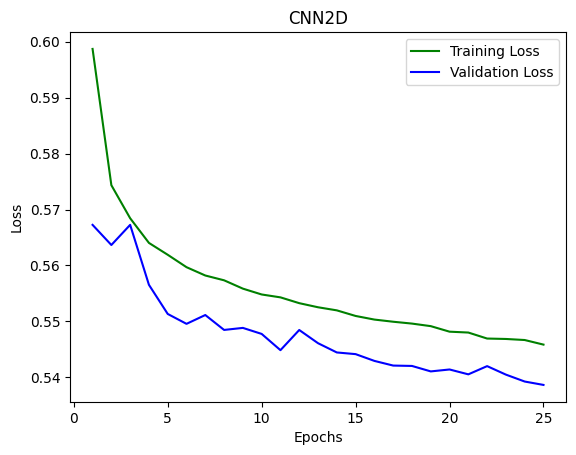

In [143]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, 26)
plt.plot(epochs, train_loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('CNN2D')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

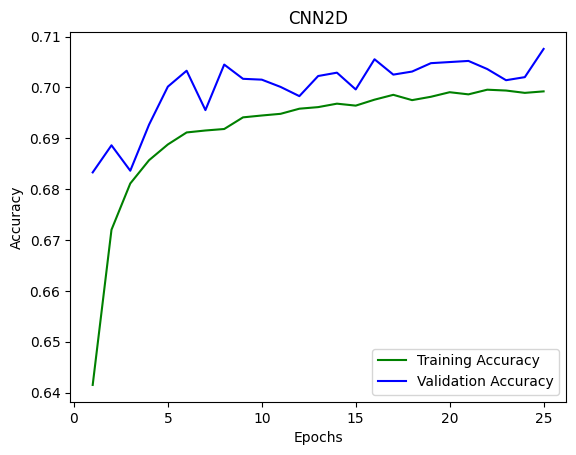

In [144]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, 26)
plt.plot(epochs, train_acc, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('CNN2D')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [145]:
y_pred = cnn2d.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)

557/557 [==============================] - 1s 2ms/step


In [146]:
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate

In [147]:
print('\nTesting Accuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred_classes)*100))

print('Precision: {:.2f}'.format(precision_score(y_test, y_pred_classes, average='weighted')*100))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred_classes, average='weighted')*100))
print('F1-score-w: {:.2f}\n'.format(f1_score(y_test, y_pred_classes, average='weighted')*100))
print('F1-score-m: {:.2f}\n'.format(f1_score(y_test, y_pred_classes, average='macro')*100))


Testing Accuracy: 58.71

Precision: 97.82
Recall: 58.71
F1-score-w: 72.39

F1-score-m: 39.86



In [148]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_classes)
print(cm)

[[10207  7293]
 [   57   243]]
